In [1]:
include("../EuclidElements.jl");

# Book 1

## Proposition 5

In isoceles triangles the angles at the base are equal to one another, and, if the equal straight lines be produced further, the angles under the base will be equal to one another.

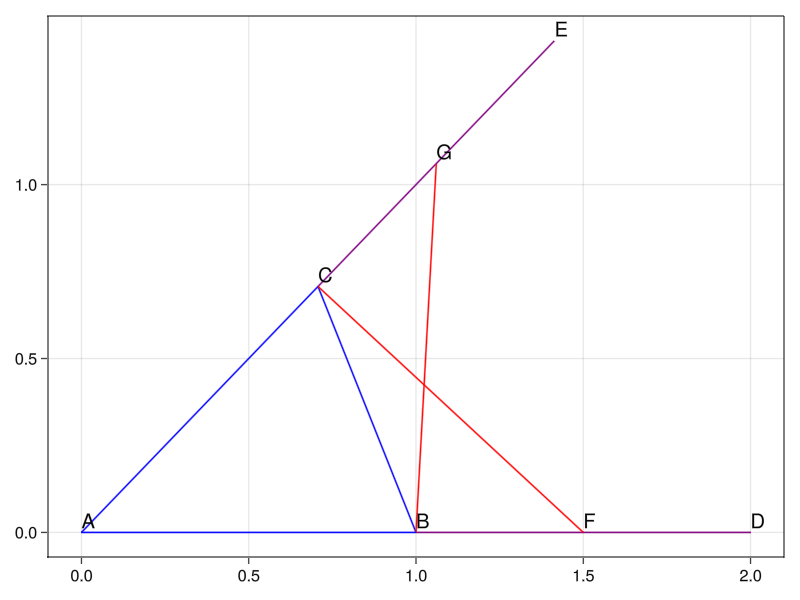

In [2]:
#ABC is isosceles, AB = AC
len_AB_0 = 1.0
len_AB = Observable(len_AB_0)
∠BAC_0 = π/4
∠BAC = Observable(∠BAC_0)
len_extend_0 = 1.0
len_extend = Observable(len_extend_0)

#Construct the triangle...
A_0 = Point2f(0,0)
A = Observable(A_0)
B_0 = Point2f(len_AB_0,0)
B = @lift(Point2f($len_AB,0))
function get_C(∠_n, B_n)
    C_x,C_y = [cos(∠_n) -sin(∠_n); sin(∠_n) cos(∠_n)]*B_n
    Point2f(C_x, C_y)
end
C_0 = get_C(∠BAC_0, B_0)
C = @lift(get_C($∠BAC, $B))

#Create BD & CE off of AB, AC
D = @lift(continue_line($A, $B, $len_extend))
E = @lift(continue_line($A, $C, $len_extend))

#Get F along BD
F = @lift(continue_line($A, $B, $len_extend/2))

#Take AG equal to AF
G = @lift(continue_line($A, $C, $len_extend/2))


#setup the chart space...
f = Figure()
ax = Axis(f[1,1])

# Draw the lines
lines!(@lift([$A,$B]), color=:blue)
lines!(@lift([$A,$C]), color=:blue)
lines!(@lift([$B,$C]), color=:blue)
lines!(@lift([$B,$D]), color=:purple)
lines!(@lift([$C,$E]), color=:purple)
lines!(@lift([$F,$C]), color=:red)
lines!(@lift([$G,$B]), color=:red)

#Now draw the point labels
Apoint = text!(A, text="A")
Bpoint = text!(B, text="B")
Cpoint = text!(C, text="C")
Dpoint = text!(D, text="D")
Epoint = text!(E, text="E")
Fpoint = text!(F, text="F")
Gpoint = text!(G, text="G")

#Draw and show the chart :)
current_figure()